In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/차별금지법(59,421건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '블로그'))
    return df

twitter = load_all_data()

## 트위터 Sheet

In [4]:
twitter.isna().sum()

Unnamed: 0      0
Unnamed: 1      0
Unnamed: 2      8
Unnamed: 3    149
dtype: int64

In [5]:
twitter.columns = twitter.iloc[0]
twitter.drop(0, inplace=True, axis=0)
twitter = twitter[twitter['내용'].str.len() < 1000]

print(twitter.shape)
twitter.head()

(2690, 4)


,작성일,작성자,제목,내용
24,2021/07/08,gbhana,"평등으로 위장된 ‘차별금지법’ 반대한다, 철회하라!","한교총, ‘차별금지법 반대 기도회’ \n소강석 목사 “차별금지법 저지해야” \n“평..."
34,2021/07/10,onepointministry,차별금지법이 통과한다면 벌어지는 일들,2018.8.29. 수요일에 국가인권위원회 인권센터에서 1차 차별금지법 토론이 있었...
37,2021/09/09,innsbruckgir,"""EBS 주디스 버틀러의 소아성애, 근친상간 지지 구체적 증거 제시한다""(차별금지법...","차바아 긴급방송 ! \n"" EBS 주디스 버틀러의 소아성애와 근친상간 지지 구체적 ..."
38,2021/09/03,windhope_humanrights,[평등의 이어달리기 온라인 농성 : 바람 주관] 자연에서 나누는 차별금지법 이야기,[2021 평등의 이어달리기 온라인 농성] \n“자연에서 나누는 차별금지법 이야기”...
39,2021/08/05,freedomphil,법앞의 평등을 위반하는 차별금지법,법앞의 평등을 위반하는 차별금지법 \n이 자료는 2021.8월 4일 바른사회시민회...


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_twitter = tfdif(twitter['내용'])

In [8]:
tfidf_twitter

,00,010,02,06,10,10만,10시,10시30분,11,11시,...,형통한삶 우리모두태아였다,혹은,확대,활동을,회장,후보,후보가,후보는,후보의,힘을
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import pickle

tfidf_twitter.to_pickle('tfidf_twitter.pkl')

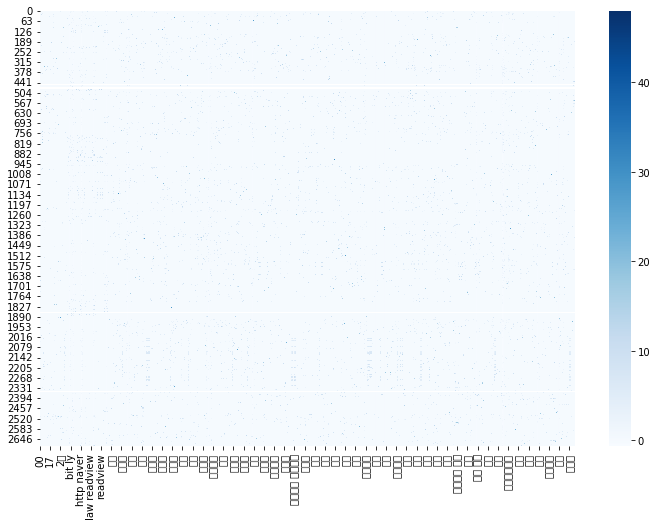

In [10]:
tfidf_twitter = (tfidf_twitter - tfidf_twitter.mean()) / tfidf_twitter.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_twitter, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above